In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns
import gmaps
import os

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Import API key
from api_keys import g_key
from api_keys import weather_api_key
gmaps.configure(api_key=g_key)

# Save config information.
map_url = "https://maps.googleapis.com/maps/api/geocode/json?"

# Build partial query URL
map_query_url = f"{map_url}&key={g_key}&address="

# Input File (CSV)
input_data_file_city = "Data/annual_aqi_by_cbsa_2019.csv"
input_data_file_county = "Data/annual_aqi_by_county_2019.csv"

aqi_city = pd.read_csv(input_data_file_city)
aqi_county = pd.read_csv(input_data_file_county)

In [2]:
########################
#CREATING DATA BY STATE
########################
aqi_county_groups = aqi_county.set_index('State').groupby(['State'])

# Get Average data by State
good_days = aqi_county_groups["Good Days"].mean()
moderate_days = aqi_county_groups["Moderate Days"].mean()
unhealthy_days = aqi_county_groups["Unhealthy Days"].mean()
very_unhealthy_days = aqi_county_groups["Very Unhealthy Days"].mean()
hazardous_days = aqi_county_groups["Hazardous Days"].mean()
days_co = aqi_county_groups["Days CO"].mean()
days_no2 = aqi_county_groups["Days NO2"].mean()
days_ozone = aqi_county_groups["Days Ozone"].mean()
days_so2 = aqi_county_groups["Days SO2"].mean()

# Create DataFrame
aqi_state_summary = pd.DataFrame({"Good Days" : good_days,
                                  "Moderate Days" : moderate_days,
                                  "Unhealthy Days" : unhealthy_days,
                                  "Very Unhealthy Days" : very_unhealthy_days,
                                  "Hazardous Days" : hazardous_days,
                                  "Days CO" : days_co,
                                  "Days NO2" : days_no2,
                                  "Days Ozone" : days_ozone,
                                  "Days SO2" : days_so2                                  
                             })

aqi_state_summary.head()

,Good Days,Moderate Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Days CO,Days NO2,Days Ozone,Days SO2
State,,,,,,,,,
Alabama,142.687500,32.937500,0.062500,0.000000,0.000000,0.062500,0.062500,105.187500,4.625000
Alaska,157.500000,25.333333,1.333333,0.000000,0.000000,0.500000,2.666667,52.833333,0.166667
Arizona,183.846154,80.615385,0.538462,0.230769,0.538462,0.153846,0.076923,174.769231,5.692308
Arkansas,146.384615,32.615385,0.000000,0.000000,0.000000,0.076923,0.153846,88.538462,0.000000
California,157.075472,43.396226,0.566038,0.018868,0.132075,0.283019,1.867925,140.264151,0.037736


In [3]:
# Top 5 States with Good Days
aqi_state_summary.sort_values(by='Good Days', ascending=False).head()

,Good Days,Moderate Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Days CO,Days NO2,Days Ozone,Days SO2
State,,,,,,,,,
Maine,257.600000,13.300000,0.1,0.0,0.0,0.300000,5.000000,209.400000,0.000000
North Dakota,250.000000,22.500000,0.1,0.0,0.0,0.100000,2.000000,221.000000,5.700000
New York,237.000000,22.903226,0.0,0.0,0.0,0.258065,3.709677,179.419355,27.258065
Massachusetts,215.538462,25.153846,0.0,0.0,0.0,0.153846,4.923077,192.923077,0.000000
Mississippi,211.300000,42.300000,0.0,0.0,0.0,0.100000,0.100000,144.300000,0.000000


In [4]:
# Top 5 States with Hazardous Days
aqi_state_summary.sort_values(by='Hazardous Days', ascending=False).head()

,Good Days,Moderate Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Days CO,Days NO2,Days Ozone,Days SO2
State,,,,,,,,,
Puerto Rico,89.000000,19.000000,0.200000,2.600000,2.000000,22.300000,13.300000,9.800000,10.300000
Arizona,183.846154,80.615385,0.538462,0.230769,0.538462,0.153846,0.076923,174.769231,5.692308
New Mexico,133.818182,69.909091,0.272727,0.181818,0.272727,0.000000,0.818182,161.727273,0.090909
California,157.075472,43.396226,0.566038,0.018868,0.132075,0.283019,1.867925,140.264151,0.037736
Colorado,131.440000,54.120000,0.080000,0.000000,0.040000,0.320000,3.920000,140.520000,0.120000


In [5]:
# Top 5 States with higher than normal Ozone
aqi_state_summary.sort_values(by='Days Ozone', ascending=False).head()

,Good Days,Moderate Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Days CO,Days NO2,Days Ozone,Days SO2
State,,,,,,,,,
Utah,192.357143,75.357143,0.571429,0.071429,0.0,0.214286,9.928571,243.357143,0.071429
Delaware,208.333333,64.000000,0.000000,0.000000,0.0,0.333333,1.333333,223.333333,0.000000
North Dakota,250.000000,22.500000,0.100000,0.000000,0.0,0.100000,2.000000,221.000000,5.700000
Maine,257.600000,13.300000,0.100000,0.000000,0.0,0.300000,5.000000,209.400000,0.000000
Massachusetts,215.538462,25.153846,0.000000,0.000000,0.0,0.153846,4.923077,192.923077,0.000000


In [6]:
########################
#CREATING DATA BY CITY
########################

# Data is not collected for all 365 days by each city so an accurate picture cannot be attained with certainty. 
#This has to be taken into consideration when looking at results

#collected data percentage 
aqi_city["Year Coverage"] = aqi_city["Days with AQI"] / 365
aqi_city["Good Day Percent"] = aqi_city["Good Days"]/aqi_city["Days with AQI"]

# Cities with best data coverage for evaluation (atleast 70% or higher data collected in 365 days)  
coverage = aqi_city.loc[aqi_city["Year Coverage"] >= .70]
coverage_df = pd.DataFrame(coverage)

# Top 5 cities with best air quality
coverage_df.sort_values(['Good Day Percent'], ascending=[False]).head()

,CBSA,CBSA Code,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Year Coverage,Good Day Percent
282,"Malone, NY",31660,2019,272,272,0,0,0,0,0,...,0,0,0,0,0,272,0,0,0.745205,1.000000
27,"Augusta-Waterville, ME",12300,2019,270,266,4,0,0,0,0,...,45,33,0,50,210,0,10,0,0.739726,0.985185
254,"Lake Havasu City-Kingman, AZ",29420,2019,273,268,5,0,0,0,0,...,29,15,0,0,0,0,0,273,0.747945,0.981685
477,"Utica-Rome, NY",46540,2019,267,260,7,0,0,0,0,...,40,27,0,0,115,0,152,0,0.731507,0.973783
31,"Bangor, ME",12620,2019,304,294,10,0,0,0,0,...,45,33,0,0,208,0,92,4,0.832877,0.967105


In [7]:
# The original imported dataset for AQI does not have Latitude and Longitude for each city.  In order to map it, lat & Lng
# is pulled from google

available_cities = []
state = []
lats = []
lngs = []
medianAQI = []
good_days = []
hazardous_days = []
percentile = []

print("----------Pulling City Lat and Lng data------------")

#loop through all the cities from the imported dataset
for i in range (len(aqi_city['CBSA'])):
    try:
        #handle spaces in city names
        response = requests.get(map_query_url + aqi_city['CBSA'][i].replace(" ","+")).json()

        #gather city data
        available_cities.append(aqi_city['CBSA'][i])
        
        #get state from city name
        state.append(aqi_city['CBSA'][i].rsplit(", ")[1])
        
        #get lat & Lng from json response
        lat = round(response['results'][0]['geometry']['location']['lat'], 2)
        lng = round(response['results'][0]['geometry']['location']['lng'], 2)
        lats.append(lat)
        lngs.append(lng)
        
        #collect medianAQI for found cities
        medianAQI.append(aqi_city['Median AQI'][i])
        
        #collect good days for found cities
        good_days.append(aqi_city['Good Days'][i])
        
        #collect hazardous days for found cities
        hazardous_days.append(aqi_city['Hazardous Days'][i])
        
        #collect percentile AQI 
        percentile.append(aqi_city['90th Percentile AQI'][i])

        #print city data as its aquired
        print(aqi_city['CBSA'][i] + ", Lat:" + str(lat) + ", Lng:" + str(lng))
              
    except Exception:
        #print city name that was not found
        print(aqi_city['CBSA'][i] + " not found!")

print("-------------Data Read Completed-------------")

available_city_data = {
    "City":available_cities,
    "State": state,
    "Lat":lats,
    "Lng":lngs,
    "AQI": medianAQI,
    "Good Days": good_days,
    "Hazardous Days": hazardous_days,
    "90th Percentile AQI": percentile
}


----------Pulling City Lat and Lng data------------
Aberdeen, SD, Lat:45.46, Lng:-98.49
Aberdeen, WA, Lat:46.98, Lng:-123.82
Adjuntas, PR, Lat:18.16, Lng:-66.72
Adrian, MI, Lat:41.9, Lng:-84.04
Akron, OH, Lat:41.08, Lng:-81.52
Albany, GA, Lat:31.58, Lng:-84.16
Albany, OR, Lat:44.64, Lng:-123.11
Albany-Schenectady-Troy, NY, Lat:42.76, Lng:-73.65
Albuquerque, NM, Lat:35.08, Lng:-106.65
Alexandria, LA, Lat:31.31, Lng:-92.45
Allentown-Bethlehem-Easton, PA-NJ, Lat:40.58, Lng:-75.5
Altoona, PA, Lat:40.52, Lng:-78.39
Amarillo, TX, Lat:35.22, Lng:-101.83
Americus, GA, Lat:32.07, Lng:-84.23
Anchorage, AK, Lat:61.22, Lng:-149.9
Ann Arbor, MI, Lat:42.28, Lng:-83.74
Appleton, WI, Lat:44.26, Lng:-88.42
Ardmore, OK, Lat:34.17, Lng:-97.14
Arkadelphia, AR, Lat:34.12, Lng:-93.05
Asheville, NC, Lat:35.6, Lng:-82.55
Ashtabula, OH, Lat:41.87, Lng:-80.79
Athens, OH, Lat:39.33, Lng:-82.1
Athens, TN, Lat:35.44, Lng:-84.59
Athens-Clarke County, GA, Lat:33.95, Lng:-83.36
Atlanta-Sandy Springs-Roswell, GA, Lat:

Harrisonburg, VA, Lat:38.45, Lng:-78.87
Hartford-West Hartford-East Hartford, CT, Lat:41.77, Lng:-72.67
Hattiesburg, MS, Lat:31.33, Lng:-89.29
Helena, MT, Lat:46.59, Lng:-112.04
Hermiston-Pendleton, OR, Lat:45.85, Lng:-119.31
Hickory-Lenoir-Morganton, NC, Lat:35.78, Lng:-81.34
Hilo, HI, Lat:19.72, Lng:-155.09
Hobbs, NM, Lat:32.7, Lng:-103.14
Holland, MI, Lat:42.79, Lng:-86.11
Homosassa Springs, FL, Lat:28.8, Lng:-82.58
Hot Springs, AR, Lat:34.5, Lng:-93.06
Houma-Thibodaux, LA, Lat:29.78, Lng:-90.81
Houston-The Woodlands-Sugar Land, TX, Lat:29.6, Lng:-95.62
Huntington, IN, Lat:40.88, Lng:-85.5
Huntington-Ashland, WV-KY-OH, Lat:38.33, Lng:-82.48
Huntsville, AL, Lat:34.73, Lng:-86.59
Idaho Falls, ID, Lat:43.49, Lng:-112.04
Indiana, PA, Lat:40.62, Lng:-79.15
Indianapolis-Carmel-Anderson, IN, Lat:39.84, Lng:-86.18
Iowa City, IA, Lat:41.66, Lng:-91.53
Ithaca, NY, Lat:42.44, Lng:-76.5
Jackson, MS, Lat:32.3, Lng:-90.18
Jackson, TN, Lat:35.61, Lng:-88.81
Jackson, WY-ID, Lat:43.48, Lng:-110.76
J

Rome, GA, Lat:34.26, Lng:-85.16
Rutland, VT, Lat:43.61, Lng:-72.97
Sacramento--Roseville--Arden-Arcade, CA, Lat:38.6, Lng:-121.38
Salem, OH, Lat:40.9, Lng:-80.86
Salem, OR, Lat:44.94, Lng:-123.04
Salinas, CA, Lat:36.68, Lng:-121.66
Salisbury, MD-DE, Lat:38.35, Lng:-75.6
Salt Lake City, UT, Lat:40.76, Lng:-111.89
San Antonio-New Braunfels, TX, Lat:29.42, Lng:-98.49
San Diego-Carlsbad, CA, Lat:33.16, Lng:-117.35
San Francisco-Oakland-Hayward, CA, Lat:37.77, Lng:-122.42
San Jose-Sunnyvale-Santa Clara, CA, Lat:37.37, Lng:-122.04
San Juan-Carolina-Caguas, PR, Lat:18.24, Lng:-66.04
San Luis Obispo-Paso Robles-Arroyo Grande, CA, Lat:35.13, Lng:-120.6
Sandpoint, ID, Lat:48.28, Lng:-116.55
Santa Cruz-Watsonville, CA, Lat:36.91, Lng:-121.76
Santa Fe, NM, Lat:35.69, Lng:-105.94
Santa Maria-Santa Barbara, CA, Lat:34.95, Lng:-120.44
Santa Rosa, CA, Lat:38.44, Lng:-122.71
Sault Ste. Marie, MI, Lat:46.5, Lng:-84.35
Savannah, GA, Lat:32.08, Lng:-81.09
Sayre, PA, Lat:41.98, Lng:-76.52
Scottsbluff, NE, 

In [36]:
map_ready_data = pd.DataFrame(available_city_data)
map_ready_data.head()

,City,State,Lat,Lng,AQI,Good Days,Hazardous Days,90th Percentile AQI
0,"Aberdeen, SD",SD,45.46,-98.49,24,52,0,56
1,"Aberdeen, WA",WA,46.98,-123.82,18,199,0,30
2,"Adjuntas, PR",PR,18.16,-66.72,18,53,0,44
3,"Adrian, MI",MI,41.90,-84.04,40,145,0,57
4,"Akron, OH",OH,41.08,-81.52,44,203,0,62


In [48]:
#KENG85 | Rename Column to merge on CBSA
map_ready_data.rename(columns = {"City":"CBSA"}, inplace = True)


In [50]:
#KENG85 | Outer Merge 
merged_aqi_data = pd.merge(map_ready_data, aqi_city, how="outer", on='CBSA')
merged_aqi_data.head()

,CBSA,State,Lat,Lng,AQI,Good Days_x,Hazardous Days_x,90th Percentile AQI_x,CBSA Code,Year,...,90th Percentile AQI_y,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Year Coverage,Good Day Percent
0,"Aberdeen, SD",SD,45.46,-98.49,24,52,0,56,10100,2019,...,56,24,0,0,0,0,54,6,0.164384,0.866667
1,"Aberdeen, WA",WA,46.98,-123.82,18,199,0,30,10140,2019,...,30,18,0,0,0,0,199,0,0.545205,1.000000
2,"Adjuntas, PR",PR,18.16,-66.72,18,53,0,44,10260,2019,...,44,18,0,0,0,0,57,0,0.156164,0.929825
3,"Adrian, MI",MI,41.90,-84.04,40,145,0,57,10300,2019,...,57,40,0,0,94,0,87,0,0.495890,0.801105
4,"Akron, OH",OH,41.08,-81.52,44,203,0,62,10420,2019,...,62,44,0,0,162,1,110,0,0.747945,0.743590


y = 0.0x + 38.41


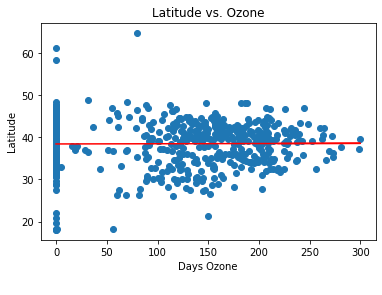

In [60]:
#KENG85 | To determine whether latitude (as an indicator of relative temperature) has an affect on air quality
#KENG85 | as indicated by Ozone

y_values = merged_aqi_data["Lat"]
x_values = merged_aqi_data["Days Ozone"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.ylabel('Latitude')
plt.xlabel('Days Ozone')
plt.title("Latitude vs. Ozone")
plt.plot(x_values,regress_values,"r-")
plt.savefig('scatter_ozone_v_lat.png')
plt.annotate(line_eq, (2,5), fontsize=15,color="red")
print(line_eq);

y = 0.0x + 38.27


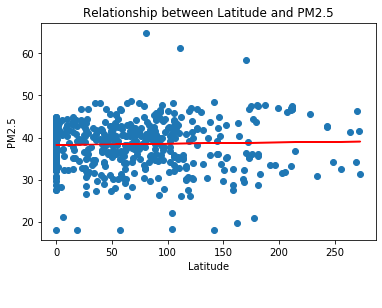

In [61]:
#KENG85 | To determine whether latitude (as an indicator of relative temperature) has an affect on air quality
#KENG85 | as indicated by PM2.5

y_values = merged_aqi_data["Lat"]
x_values = merged_aqi_data["Days PM2.5"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.ylabel('PM2.5')
plt.xlabel('Latitude')
plt.title("Relationship between Latitude and PM2.5")
plt.plot(x_values,regress_values,"r-")
plt.savefig('scatter_PM25_v_lat.png')
plt.annotate(line_eq, (2,2), fontsize=15,color="red")
print(line_eq);

In [63]:
#KENG85 | Calculate the correlation coefficient of Particulates to see whether there is any correlation with latitude;  
#KENG85 | Based on a correlation coefficients, we determined that Air Quality is not correlated with latitude
k_good = merged_aqi_data["Good Day Percent"]
k_bad = merged_aqi_data["Hazardous Days_x"]
k_lat = merged_aqi_data["Lat"]
k_ozone = merged_aqi_data["Days Ozone"]
k_PM2 = merged_aqi_data["Days PM2.5"]
k_CO = merged_aqi_data["Days CO"]
k_NO2 = merged_aqi_data["Days NO2"]
k_SO2 = merged_aqi_data["Days SO2"]

pm_df = pd.DataFrame({"Good Day" : k_good,
                      "Hazardous": k_bad,
                      "Lat": k_lat,
                     "Ozone" : k_ozone,
                     "PM2.5" : k_PM2,
                     "CO" : k_CO,
                     "NO2": k_NO2,
                     "SO2": k_SO2,})
pm_df.corr(method ='pearson')


,Good Day,Hazardous,Lat,Ozone,PM2.5,CO,NO2,SO2
Good Day,1.000000,-0.223781,0.223850,-0.221102,-0.163890,-0.207602,-0.116676,0.122849
Hazardous,-0.223781,1.000000,-0.160776,-0.026212,0.009578,0.139799,0.051579,-0.015090
Lat,0.223850,-0.160776,1.000000,0.006728,0.030699,-0.020339,-0.000379,0.001271
Ozone,-0.221102,-0.026212,0.006728,1.000000,-0.492758,0.021170,0.046008,-0.274575
PM2.5,-0.163890,0.009578,0.030699,-0.492758,1.000000,0.062112,-0.012547,-0.201061
CO,-0.207602,0.139799,-0.020339,0.021170,0.062112,1.000000,0.180226,-0.029304
NO2,-0.116676,0.051579,-0.000379,0.046008,-0.012547,0.180226,1.000000,-0.058743
SO2,0.122849,-0.015090,0.001271,-0.274575,-0.201061,-0.029304,-0.058743,1.000000


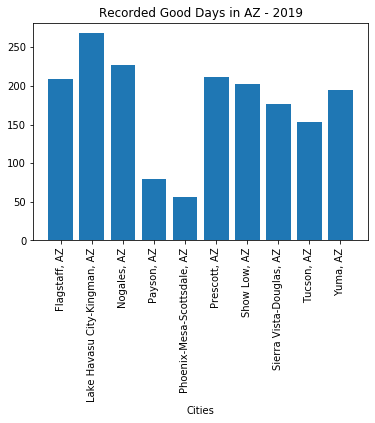

,CBSA,State,Lat,Lng,AQI,Good Days,Hazardous Days,90th Percentile AQI
162,"Flagstaff, AZ",AZ,35.20,-111.65,46,209,0,61
254,"Lake Havasu City-Kingman, AZ",AZ,34.48,-114.32,15,268,0,29
332,"Nogales, AZ",AZ,31.34,-110.93,29,227,0,56
354,"Payson, AZ",AZ,34.23,-111.33,67,79,0,112
358,"Phoenix-Mesa-Scottsdale, AZ",AZ,33.42,-111.83,67,56,7,104
372,"Prescott, AZ",AZ,34.54,-112.47,44,211,0,58
433,"Show Low, AZ",AZ,34.25,-110.03,45,203,0,61
435,"Sierra Vista-Douglas, AZ",AZ,31.83,-109.95,47,176,0,71
469,"Tucson, AZ",AZ,32.22,-110.97,49,153,0,74
519,"Yuma, AZ",AZ,32.69,-114.63,46,195,0,71


In [54]:
# Hypothesis: An assumption can be made that region with higher concentration of population & industry can reduce air quality
# Congested metropolitan city like Phoenix with high traffic volume and more industries would show lower number of Good Days 
# (AQI between 0-50) than cities that have lower population, low traffic and no pollution creating industry

AZ_data = map_ready_data.loc[map_ready_data["State"] == 'AZ']

#create bar chart
x_axis = np.arange(len(AZ_data))
plt.bar(x_axis, AZ_data["Good Days"], align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, AZ_data["CBSA"], rotation="vertical")
plt.title('Recorded Good Days in AZ - 2019')
plt.xlabel('Cities')
plt.show()
AZ_data

# Conclusion: Phoenix metropolitan area does experiences lower number of Good Days.  Lake Havasu City-Kingman reported 
# higher number of Good Days with low median AQI

In [55]:
# Heatmap of Arizona based on AQI data
location_data = AZ_data[["Lat","Lng"]]
data = AZ_data["AQI"].astype(float)

#Figure Layout
figure_layout = {
    'width': '800px',
    'height': '400px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure(layout=figure_layout)
heatmap = gmaps.heatmap_layer(location_data, weights=data,
                              dissipating=False, max_intensity=100,
                              point_radius=1)
fig.add_layer(heatmap)
fig

Figure(layout=FigureLayout(border='1px solid black', height='400px', margin='0 auto 0 auto', padding='1px', wi…

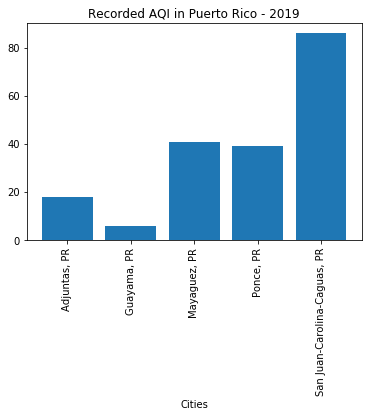

,CBSA,State,Lat,Lng,AQI,Good Days,Hazardous Days,90th Percentile AQI
2,"Adjuntas, PR",PR,18.16,-66.72,18,53,0,44
192,"Guayama, PR",PR,17.98,-66.11,6,74,0,7
289,"Mayaguez, PR",PR,18.20,-67.15,41,12,0,71
366,"Ponce, PR",PR,18.01,-66.61,39,104,0,67
411,"San Juan-Carolina-Caguas, PR",PR,18.24,-66.04,86,37,20,316


In [57]:
# Top 5 States with Hazardous Days resulted in Puerto Rico as a territory with most number of Hazardous Days.
# below graphs shows which city had the most Hazardous days in Puerto Rico 
by_state_data = map_ready_data.loc[map_ready_data["State"] == 'PR']

#create bar chart
x_axis = np.arange(len(by_state_data))
plt.bar(x_axis, by_state_data["AQI"], align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, by_state_data["CBSA"], rotation="vertical")
plt.title('Recorded AQI in Puerto Rico - 2019')
plt.xlabel('Cities')
plt.show()
by_state_data

#Conclusion: San Juan-Carolina-Caguas had the most occurance with Hazardous Days

In [58]:
# Heatmap of Puerto Rico based on AQI data
location_data = by_state_data[["Lat","Lng"]]
data = by_state_data["AQI"].astype(float)

#Figure Layout
figure_layout = {
    'width': '800px',
    'height': '400px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure(layout=figure_layout)
heatmap = gmaps.heatmap_layer(location_data, weights=data,
                              dissipating=False, max_intensity=100,
                              point_radius=1)
fig.add_layer(heatmap)
fig

Figure(layout=FigureLayout(border='1px solid black', height='400px', margin='0 auto 0 auto', padding='1px', wi…

In [59]:
# Hypothesis: CNN Article on Tue 4/7/2020 showed a heatmap of US with cities that have PM 2.5 higher than 13 micrograms.
# The data was averaged from 2000-2016. Using the data from Annual AQI by CBSA 2019, we want to see if 2019 data shows
# same heatmap as CNN source.  
# Source article URL: https://www.cnn.com/2020/04/07/health/covid-19-air-pollution-risks-wellness/index.html

#AQI Value AQI Category AQI Color (Source: https://www.epa.gov/sites/production/files/2014-05/documents/zell-aqi.pdf)
#   0 - 50 Good Green
#  51 - 100 Moderate Yellow
# 101 - 150 Unhealthy for Sensitive Groups Orange
# 151 - 200 Unhealthy Red
# 201 - 300 Very Unhealthy Purple
# 301 - 500 Hazardous Maroon

AQI_data = map_ready_data.loc[map_ready_data["90th Percentile AQI"].astype(float) >= 51]
data_df = pd.DataFrame(AQI_data)

location_data = data_df[["Lat","Lng"]]
data = data_df["90th Percentile AQI"].astype(float)

#Figure Layout
figure_layout = {
    'width': '800px',
    'height': '400px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure(layout=figure_layout)
heatmap = gmaps.heatmap_layer(location_data, weights=data,
                              dissipating=False, max_intensity=120,
                              point_radius=1)
fig.add_layer(heatmap)
fig

# Conclusion: 2019 Data below looks similar to the average data from 2000-2016 as shown in the article.  Visually, a case
# can be made that there are more cities with bad air quality in 2019 than average from 2000-2016.
# Souce: https://cdn.cnn.com/cnnnext/dam/assets/200407173521-20200407-covid-19-air-pollution-top-map-exlarge-169.jpg)

Figure(layout=FigureLayout(border='1px solid black', height='400px', margin='0 auto 0 auto', padding='1px', wi…